In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
v = [-0.03, 0.05] #v-, v+
L = 0.08
k = 0.05
alpha = 0.03
tau = 1000
T = 300
s2 = 1./tau
p = [0.94, 0.61]#p_c & p_ic
dt = 2
sigma = [1, -1]

In [35]:
def a(X):
    X1 = X[0]
    X2 = X[1]
    
    Y = np.zeros(2)
    Y[0] = -(k*(X1-X2-L*np.cos(0))) - (alpha*X1)
    Y[1] = -(k*(X2-X1+L*np.cos(0))) - (alpha*X2)
    
    return Y

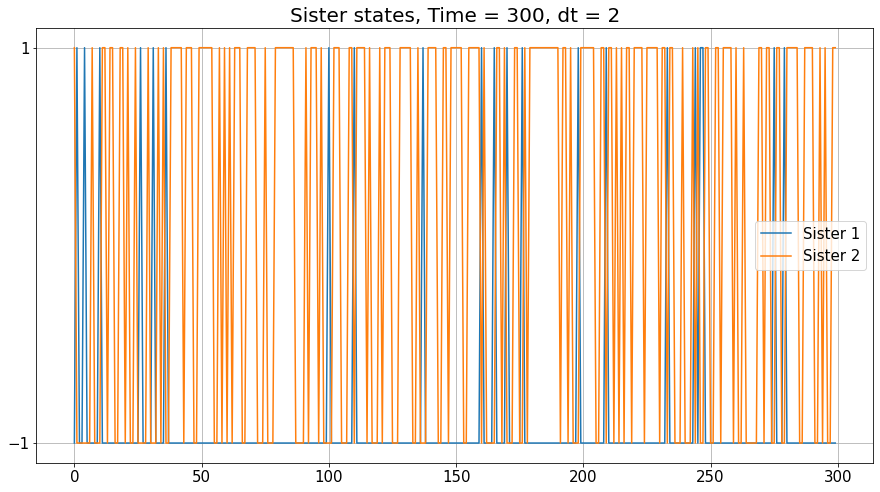

In [79]:
sigma = [1, -1]

def sister_states(p,T,dt):
    """
    p : vector of probabilities
    T : max time steps
    dt : time steps"""
    
    
    steps = np.arange(0,T,dt)
    Y = np.zeros((len(steps),2))
    Y[0] = sigma
    
    
    for i in range(1,len(steps)):
        #draw uniform random samples
        u = np.random.uniform(0,1,2)
        
        if check_coherent(Y[i-1,0]):
            p = p[0]
        #new states
        if u[0] <= p[0] and u[1] <= p[1]: 
            Y[i,0] = Y[i-1,0]
            Y[i,1] = Y[i-1,0]
            #print('C1',u,Y[i])
        
        elif u[0] <= p[0] and u[1] > p[1]: 
            Y[i,0] = -1
            Y[i,1] = -1
            #print('C2',u,Y[i])
            
        elif u[0] > p[0] and u[1] > p[1]: 
            Y[i,0] = 1
            Y[i,1] = -1
            #print('C3',u,Y[i])
            
        elif u[0] > p[0] and u[1] <= p[1]: 
            Y[i,0] = 1
            Y[i,1] = -1
            #print('C4',u,Y[i])
            
    plt.figure(figsize=(15,8))
    plt.plot(Y[:,0], label='Sister 1')
    plt.plot(Y[:,1], label='Sister 2')
    plt.yticks([-1.0,1.0], fontsize='15');plt.xticks(fontsize='15')
    plt.grid('on')
    plt.legend(fontsize='15')
    plt.title('Sister states, Time = {}, dt = {}'.format(len(steps),dt), fontsize='20')
    plt.savefig('./Plots/sisters{}.png'.format(len(steps)))
    plt.show()
    return Y

Y = sister_states(p,600,dt)



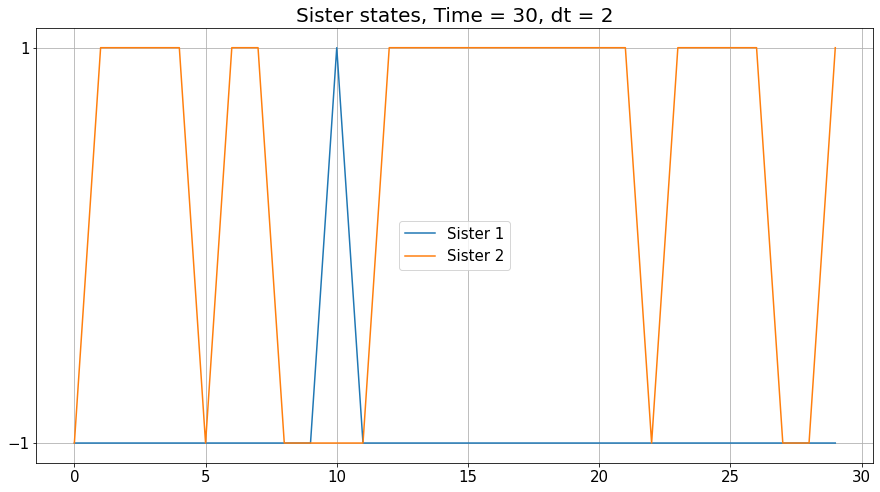

In [54]:
Y = sister_states(p,60,dt)

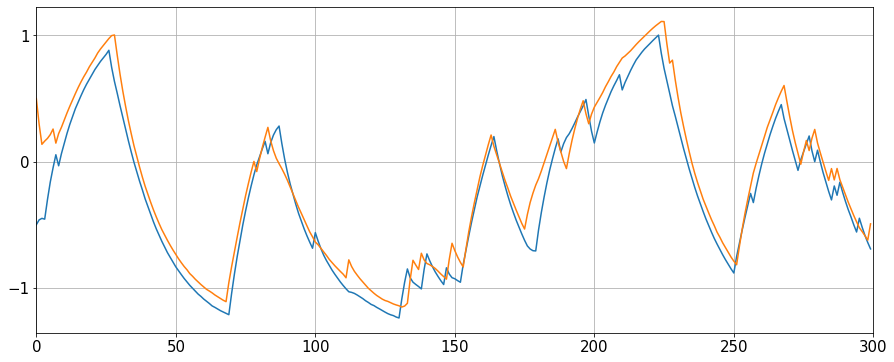

In [45]:
Z = np.zeros((len(Y),2))
Z[0] = [-0.5,0.5]

for i in range(1,len(Y)):
    
    X = a(Z[i-1])
    
    if Y[i,0] == -1 and Y[i,1] == 1:
        Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt
        
    elif Y[i,0] == -1 and Y[i,1] == -1:
        Z[i,0] = Z[i-1,0] + (-v[0] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt
    
    elif Y[i,0] == 1 and Y[i,1] == -1:
        Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[0] + X[1] + np.random.normal(0,(s2)))*dt
    
    elif Y[i,0] == 1 and Y[i,1] == 1:
        Z[i,0] = Z[i-1,0] + (-v[1] + X[0] + np.random.normal(0,(s2)))*dt
        Z[i,1] = Z[i-1,1] + (v[1] + X[1] + np.random.normal(0,(s2)))*dt
Z
plt.figure(figsize=(15,6))
plt.grid('on')
plt.xticks(fontsize='15');plt.yticks(fontsize='15',ticks=[-1.0,0.0,1.0])
plt.xlim(0,300)
plt.plot(Z[:,0])
plt.plot(Z[:,1])
#plt.savefig('./Plots/oscillations.png')
plt.show()

In [1]:
def check_coherent(u):
    if u == [1,-1] or u == [-1,1]:
        check = True
    else:
        check = False
    return check

def check_incoherent(u):
    if u == [1,1] or u == [-1,-1]:
        check = True
    else:
        check = False
    return check

In [24]:
check_incoherent([-1,-1])

True

In [28]:
def ss(p,T,dt):
    steps = np.arange(0,T,dt)
    Y = np.zeros((len(steps),2))
    Y[0] = sigma
    sign = -1
    
    for i in range(1,len(Y)):
        
        current_state = Y[i-1].tolist()
        sigma1 = current_state[0] #sister1
        sigma2 = current_state[1] #sister2
        
        #draw uniform random sample
        u = np.random.uniform(0,1,2)
        
        #check state
        if check_coherent(current_state):
            
            #compute new state using p_c
            if u[0] <= p[0] and u[1] <= p[0]: #remain coherent
                Y[i] = Y[i-1]
            elif u[0] <= p[0] and u[1] > p[0]: #sister 2 switches sign
                Y[i] = [sigma1, sigma2*sign]
            elif u[0] > p[0] and u[1] > p[0]: #both sisters switches sign
                Y[i] = [sigma1*sign, sigma2*sign]
            elif u[0] > p[0] and u[1] <= p[0]: #sister1 switches sign
                Y[i] = [sigma1*sign, sigma2]
        
        elif check_incoherent(current_state):
            
            #compute new state using p_ic
            if u[0] <= p[1] and u[1] <= p[1]: #remain coherent
                Y[i] = Y[i-1]
            elif u[0] <= p[1] and u[1] > p[1]: #sister 2 switches sign
                Y[i] = [sigma1, sigma2*sign]
            elif u[0] > p[1] and u[1] > p[1]: #both sisters switches sign
                Y[i] = [sigma1*sign, sigma2*sign]
            elif u[0] > p[1] and u[1] <= p[1]: #sister1 switches sign
                Y[i] = [sigma1*sign, sigma2]
            
    return Y

In [42]:
Y = ss(p,600,dt)

In [7]:
A = np.zeros((2,2))

In [9]:
A[0] = [2,3]

In [27]:
A[0,:].tolist()

[2.0, 3.0]

In [12]:
2*[2,3]

[2, 3, 2, 3]

In [30]:
Y

array([[ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [ 1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [ 1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [-1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [ 1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [ 1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1.,

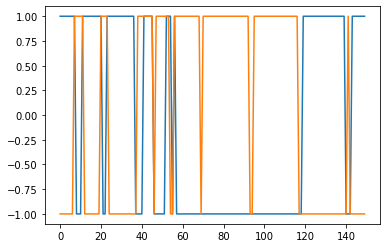

In [40]:
plt.plot(Y[:,0])
plt.plot(Y[:,1])

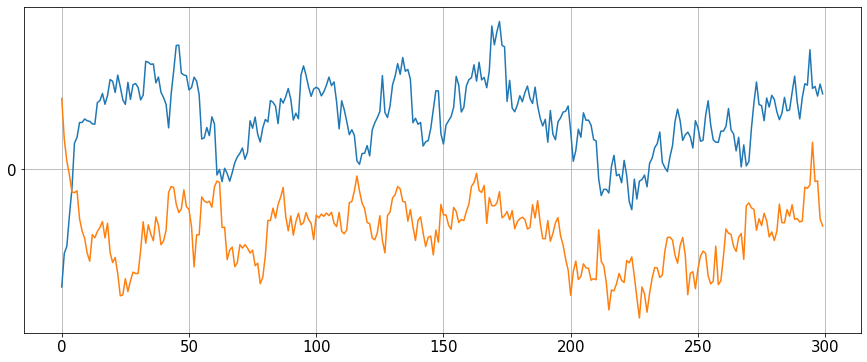

In [118]:
Z = np.zeros((len(Y),2))
Z[0] = [-0.5,0.3]

for i in range(1,len(Y)):
    
    if Y[i,0] == -1 and Y[i,0] == 1:
        Z[i,0] = ((-v[0] -k*(Z[i-1,0]-Z[i-1,1]-(L*np.cos(0))) - alpha*Z[i-1,0]  + np.random.normal(0,s))*dt) + Z[i-1,0]# ((X[0] )*dt)
        Z[i,1] = ((v[1] - k*(Z[i-1,1]-Z[i-1,0]+(L*np.cos(0))) - alpha*Z[i-1,1] + np.random.normal(0,s))*dt) + Z[i-1,1]#((X[1] + )*dt)
        
    elif Y[i,0] == -1 and Y[i,0] == -1:
        Z[i,0] = ((-v[0] -k*(Z[i-1,0]-Z[i-1,1]-(L*np.cos(0))) - alpha*Z[i-1,0] + np.random.normal(0,s))*dt) + Z[i-1,0]#((X[0] + )*dt)
        Z[i,1] = ((v[0] - k*(Z[i-1,1]-Z[i-1,0]+(L*np.cos(0))) - alpha*Z[i-1,1] + np.random.normal(0,s))*dt) + Z[i-1,1]#((X[1] + )*dt)
    
    elif Y[i,0] == 1 and Y[i,0] == -1:
        Z[i,0] = ((-v[1] -k*(Z[i-1,0]-Z[i-1,1]-(L*np.cos(0))) - alpha*Z[i-1,0] + np.random.normal(0,s))*dt) + Z[i-1,0] #((X[0] + )*dt)
        Z[i,1] = ((v[0] - k*(Z[i-1,1]-Z[i-1,0]+(L*np.cos(0))) - alpha*Z[i-1,1] + np.random.normal(0,s))*dt) + Z[i-1,1]#((X[1] + )*dt)

    elif Y[i,0] == 1 and Y[i,0] == 1:
        Z[i,0] = ((-v[1] -k*(Z[i-1,0]-Z[i-1,1]-(L*np.cos(0))) - alpha*Z[i-1,0] + np.random.normal(0,s))*dt) + Z[i-1,0]#((X[0] + np.random.normal(0,100000))*dt)
        Z[i,1] = ((v[1] - k*(Z[i-1,1]-Z[i-1,0]+(L*np.cos(0))) - alpha*Z[i-1,1] + np.random.normal(0,s))*dt) + Z[i-1,1]#((X[1] + np.random.normal(0,100000))*dt)
Z
plt.figure(figsize=(15,6))
plt.grid('on')
plt.xticks(fontsize='15');plt.yticks(fontsize='15',ticks=[-1.0,0.0,1.0])
#plt.ylim(-1,2)
plt.plot(Z[:,0])
plt.plot(Z[:,1])

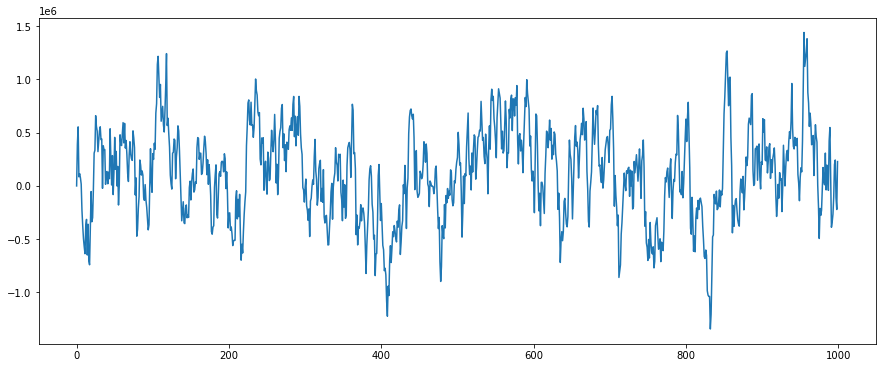

In [81]:
plt.figure(figsize=(15,6))
plt.plot(Z[:,0])

In [77]:
len(Y)

1000

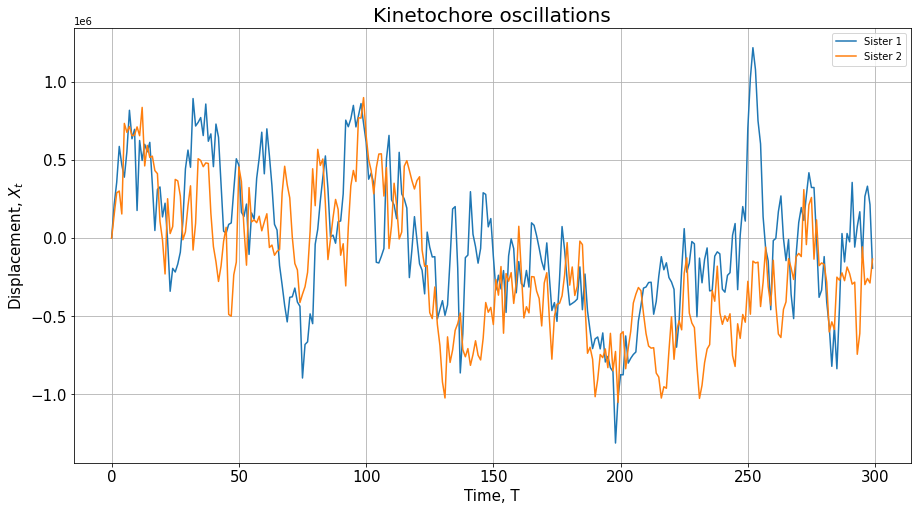

In [9]:
Y = np.zeros((T,2))
Y[0] = [-0.5,0.5]
s = 1./np.sqrt(tau)

for i in range(T-1):
    X = a(Y[i])
    
    Y[i+1,0] = Y[i,0] + ((X[0] + np.random.normal(0,100000))*dt)
    Y[i+1,1] = Y[i,1] + ((X[1] + np.random.normal(0,100000))*dt)

t = np.arange(0,T,dt)
plt.figure(figsize=(15,8))
plt.plot(Y[:,0],label='Sister 1')
plt.plot(Y[:,1],label='Sister 2')
plt.xlabel('Time, T',fontsize='15');plt.ylabel('Displacement, $X_t$',fontsize='15')
plt.title('Kinetochore oscillations',fontsize='20')
plt.grid('on')
plt.xticks(fontsize='15');plt.yticks(fontsize='15')
plt.legend(loc='best')
plt.savefig('./Plots/kinetochore_oscillations.png')
plt.show()

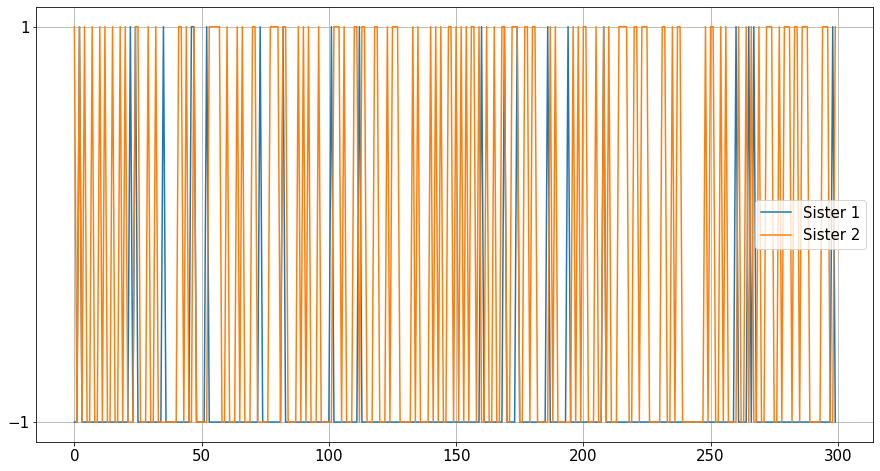

In [98]:
np.arange(0,100,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

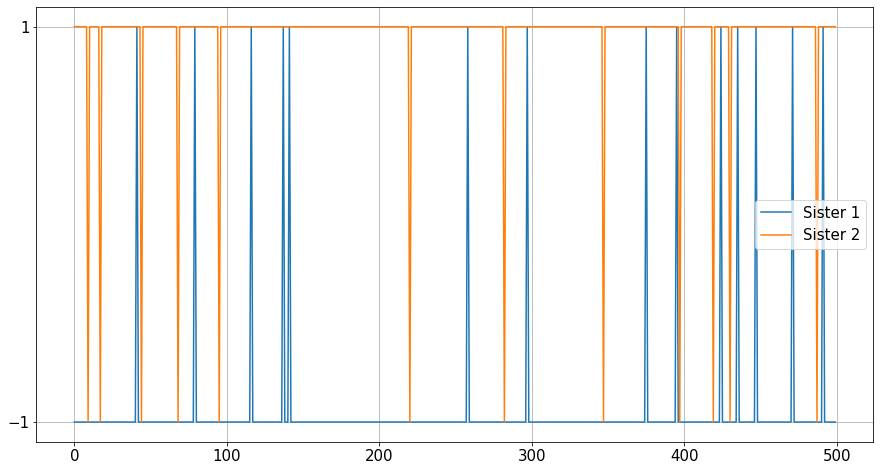

In [102]:
plt.figure(figsize=(15,8))
plt.plot(Y[:,0], label='Sister 1')
plt.plot(Y[:,1], label='Sister 2')
plt.yticks([-1.0,1.0], fontsize='15');plt.xticks(fontsize='15')
plt.grid('on')
plt.legend(fontsize='15')
plt.show()

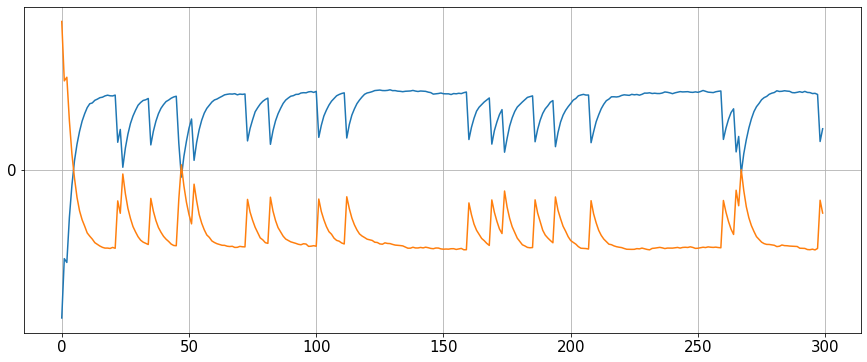

In [122]:
Z

array([[-0.5 ,  0.3 ],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.03, -0.03],
       [ 0.